In [2]:
#Import tensorflow and keras library
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing import image
from pickle4 import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
rescale = 1./255,
rotation_range = 10,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

valid_gen = ImageDataGenerator(rescale = 1./255)

In [4]:
TRAINING_DIR = r"C:\Users\BIJAY\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
VALIDATION_DIR = r"C:\Users\BIJAY\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

In [5]:
TARGET_SIZE = (224,224)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42

#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [6]:
from keras.applications.vgg16 import VGG16
#base_model_weights_path = '/kaggle/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = keras.layers.Flatten() (base_model.output)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.25)(x)
output = keras.layers.Dense(10, activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=output)

# The newly added layers are initialized with random values.
# Make sure based model remain unchanged until newly added layers weights get reasonable values.
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
LEARNING_RATE = 0.0001

#Optimizer
opt = Adam(learning_rate = LEARNING_RATE)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [11]:
TRAINING_NUM = train_data.n #or train_data.samples
VALID_NUM = valid_data.n
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

# Fit model to get reasonable weights for newly added layers.
history = model.fit(train_data,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_data,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=EPOCHS)

Epoch 1/25


ResourceExhaustedError: Graph execution error:

Detected at node 'model/block1_conv2/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
      self.io_loop.start()
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\BIJAY\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever
      super().run_forever()
    File "C:\Users\BIJAY\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\BIJAY\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\BIJAY\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell
      await result
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell
      result = self._run_cell(
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell
      result = runner(coro)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\BIJAY\AppData\Local\Temp\ipykernel_18924\1316252008.py", line 9, in <module>
      history = model.fit(train_data,
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\activations.py", line 321, in relu
      return backend.relu(
    File "C:\Users\BIJAY\anaconda3\Lib\site-packages\keras\src\backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'model/block1_conv2/Relu'
OOM when allocating tensor with shape[128,224,224,64] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model/block1_conv2/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2762]

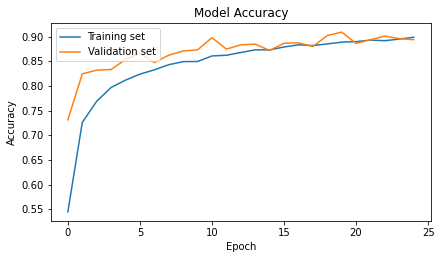

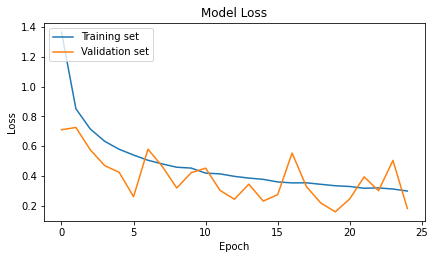

In [9]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8)) 
    
plt.subplot(221)  
# Accuracy 
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8)) 
plt.subplot(222)  
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [10]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 90.92905521392822


In [11]:
for layer in base_model.layers:
    layer.trainable = True

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate (This ensures the base model weights do not change a lot)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [12]:
TRAINING_NUM = train_data.n #or train_data.samples
VALID_NUM = valid_data.n
EPOCHS = 25

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

# Fit model to get reasonable weights for newly added layers.
history = model.fit_generator(generator = train_data,
                             steps_per_epoch = STEP_SIZE_TRAIN,
                             validation_data = valid_data,
                             validation_steps = STEP_SIZE_VALID,
                             epochs = EPOCHS)

Epoch 1/25
143/143 [==============================] - 321s 2s/step - loss: 0.2553 - accuracy: 0.9137 - val_loss: 0.2969 - val_accuracy: 0.9294
Epoch 2/25
143/143 [==============================] - 313s 2s/step - loss: 0.1931 - accuracy: 0.9330 - val_loss: 0.1213 - val_accuracy: 0.9284
Epoch 3/25
143/143 [==============================] - 312s 2s/step - loss: 0.1715 - accuracy: 0.9399 - val_loss: 0.0751 - val_accuracy: 0.9471
Epoch 4/25
143/143 [==============================] - 312s 2s/step - loss: 0.1472 - accuracy: 0.9489 - val_loss: 0.1280 - val_accuracy: 0.9433
Epoch 5/25
143/143 [==============================] - 320s 2s/step - loss: 0.1272 - accuracy: 0.9573 - val_loss: 0.3136 - val_accuracy: 0.9354
Epoch 6/25
143/143 [==============================] - 311s 2s/step - loss: 0.1164 - accuracy: 0.9601 - val_loss: 0.0438 - val_accuracy: 0.9572
Epoch 7/25
143/143 [==============================] - 313s 2s/step - loss: 0.1143 - accuracy: 0.9599 - val_loss: 0.0725 - val_accuracy: 0.9600

In [13]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 98.55040907859802


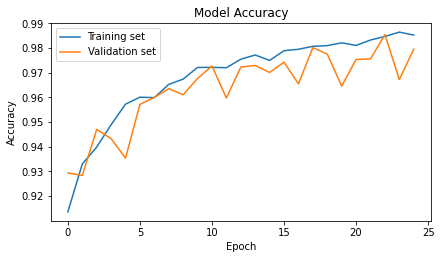

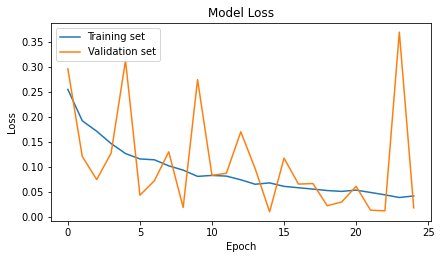

In [14]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8)) 
    
plt.subplot(221)  
# Accuracy 
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8)) 
plt.subplot(222)  
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()